In [1]:
# Importare le librerie necessarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurare Seaborn per i plot
sns.set_theme(style="whitegrid")

# Caricare il dataset
data_path = '../data/raw/winemag-data-130k-v2.csv'  # Modificare il percorso se necessario
df = pd.read_csv(data_path)

# Mostrare i primi record del dataset
df.head()


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [2]:
num_grape_varieties = df['variety'].nunique()
num_grape_varieties

707

In [3]:
import pandas as pd

# Supponiamo che df sia il tuo DataFrame originale
# Raggruppa per varietà e calcola il numero di recensioni per ogni varietà
variety_summary = df.groupby('variety').size().reset_index(name='review_count')

# Calcola la media, il minimo e il massimo del numero di recensioni per varietà
average_reviews_per_variety = variety_summary['review_count'].mean()
min_reviews_per_variety = variety_summary['review_count'].min()
max_reviews_per_variety = variety_summary['review_count'].max()

# Stampa i risultati
print(f'Average number of reviews per variety: {average_reviews_per_variety:.2f}')
print(f'Minimum number of reviews per variety: {min_reviews_per_variety}')
print(f'Maximum number of reviews per variety: {max_reviews_per_variety}')


Average number of reviews per variety: 183.83
Minimum number of reviews per variety: 1
Maximum number of reviews per variety: 13272


25th percentile: 2.0
75th percentile: 28.5


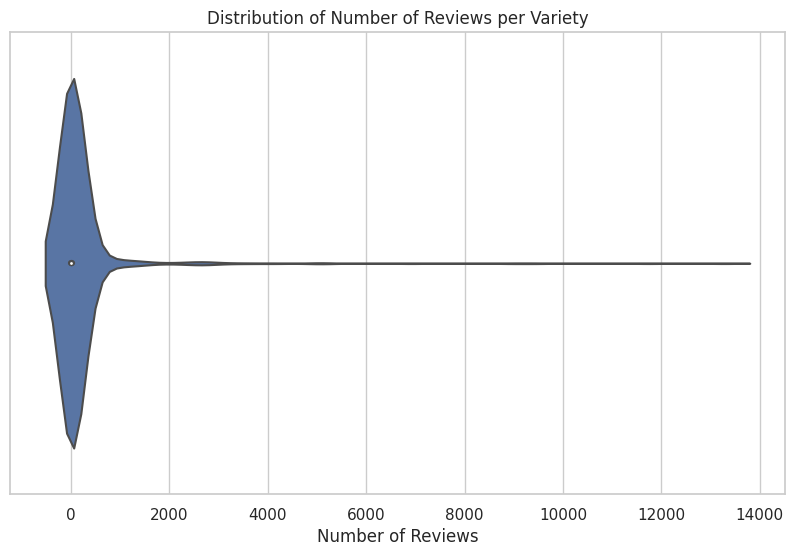

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcola i percentili 25 e 75
percentile_25 = np.percentile(variety_summary['review_count'], 25)
percentile_75 = np.percentile(variety_summary['review_count'], 75)

print(f'25th percentile: {percentile_25}')
print(f'75th percentile: {percentile_75}')

# Crea un box plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='review_count', data=variety_summary)
plt.xlabel('Number of Reviews')
plt.title('Distribution of Number of Reviews per Variety')
plt.show()


In [5]:
df = df[~df['variety'].str.contains('Blend', case=False, na=False)]  # Rimuovere i blend
variety_counts = df['variety'].value_counts()

support_threshold = 0.006*len(df)  # Set the support threshold as desired

selected_varieties = variety_counts[variety_counts >= support_threshold]

filtered_df = df[df['variety'].isin(selected_varieties.index)]
df = filtered_df
len(selected_varieties), len(filtered_df), support_threshold

(29, 85117, 625.446)

In [6]:
num_grape_varieties = df['variety'].nunique()
num_grape_varieties

29

In [7]:
df['variety'].unique(), len(df['variety'].unique())

(array(['Portuguese Red', 'Pinot Gris', 'Riesling', 'Pinot Noir',
        'Gewürztraminer', 'Cabernet Sauvignon', 'Chardonnay', 'Malbec',
        'Merlot', 'Gamay', 'Sauvignon Blanc', 'Sangiovese',
        'Cabernet Franc', 'Petite Sirah', 'Rosé', 'Zinfandel',
        'Grüner Veltliner', 'Viognier', 'Syrah', 'Nebbiolo', 'Barbera',
        'Portuguese White', 'Sangiovese Grosso', 'Shiraz', 'Grenache',
        'Pinot Grigio', 'Tempranillo', 'Glera', 'Port'], dtype=object),
 29)

In [8]:
len(df['description'].unique()), len(df['description'])

(78565, 85117)

In [9]:
df = df.drop_duplicates(subset=['description', 'variety'])
df.shape  # To check the new shape of the dataframe after dropping duplicates

(78568, 14)

In [10]:

# Analizzare la struttura del dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 78568 entries, 1 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             78568 non-null  int64  
 1   country                78547 non-null  object 
 2   description            78568 non-null  object 
 3   designation            54981 non-null  object 
 4   points                 78568 non-null  int64  
 5   price                  74357 non-null  float64
 6   province               78547 non-null  object 
 7   region_1               64603 non-null  object 
 8   region_2               37612 non-null  object 
 9   taster_name            61170 non-null  object 
 10  taster_twitter_handle  57590 non-null  object 
 11  title                  78568 non-null  object 
 12  variety                78568 non-null  object 
 13  winery                 78568 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 9.0+ MB


In [11]:

# Descrivere le variabili numeriche
df.describe()


,Unnamed: 0,points,price
count,78568.000000,78568.000000,74357.000000
mean,63437.383197,88.526601,36.543849
std,37527.339336,3.166048,39.634009
min,1.000000,80.000000,4.000000
25%,30814.250000,86.000000,18.000000
50%,62681.000000,88.000000,27.000000
75%,95552.000000,91.000000,45.000000
max,129970.000000,100.000000,2500.000000


In [12]:
df['desc_len'] = df['description'].apply(lambda x: len(x.split()))
df['desc_len'].describe()

/tmp/ipykernel_160048/2729234481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['desc_len'] = df['description'].apply(lambda x: len(x.split()))


count    78568.000000
mean        40.199152
std         11.354675
min          3.000000
25%         32.000000
50%         39.000000
75%         47.000000
max        135.000000
Name: desc_len, dtype: float64

In [13]:
correlation = df['desc_len'].corr(df['points'])
correlation

0.5543139149342815

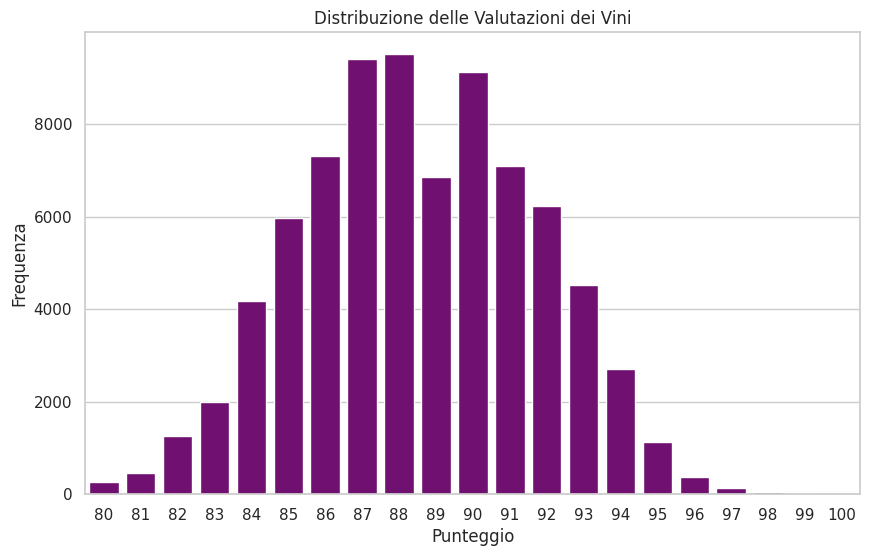

In [14]:

# Distribuzione delle valutazioni (colonna "points")
plt.figure(figsize=(10, 6))
sns.barplot(x=df['points'].value_counts().index, y=df['points'].value_counts().values, color='purple')
plt.title('Distribuzione delle Valutazioni dei Vini')
plt.xlabel('Punteggio')
plt.ylabel('Frequenza')
plt.show()


/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


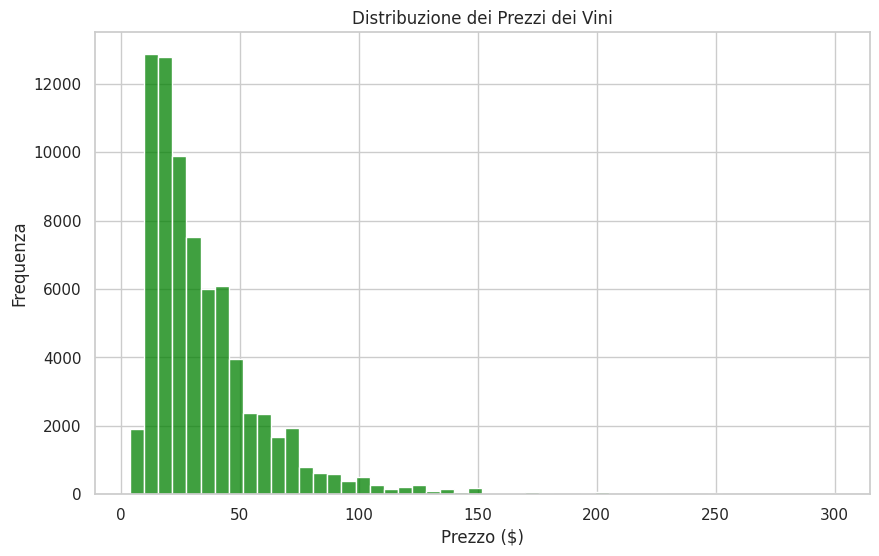

In [15]:

# Distribuzione dei prezzi (colonna "price")
plt.figure(figsize=(10, 6))
filtered_df = df[df['price'] <= 300]
sns.histplot(filtered_df['price'], bins=50, kde=False, color='green')
plt.title('Distribuzione dei Prezzi dei Vini')
plt.xlabel('Prezzo ($)')
plt.ylabel('Frequenza')
plt.show()


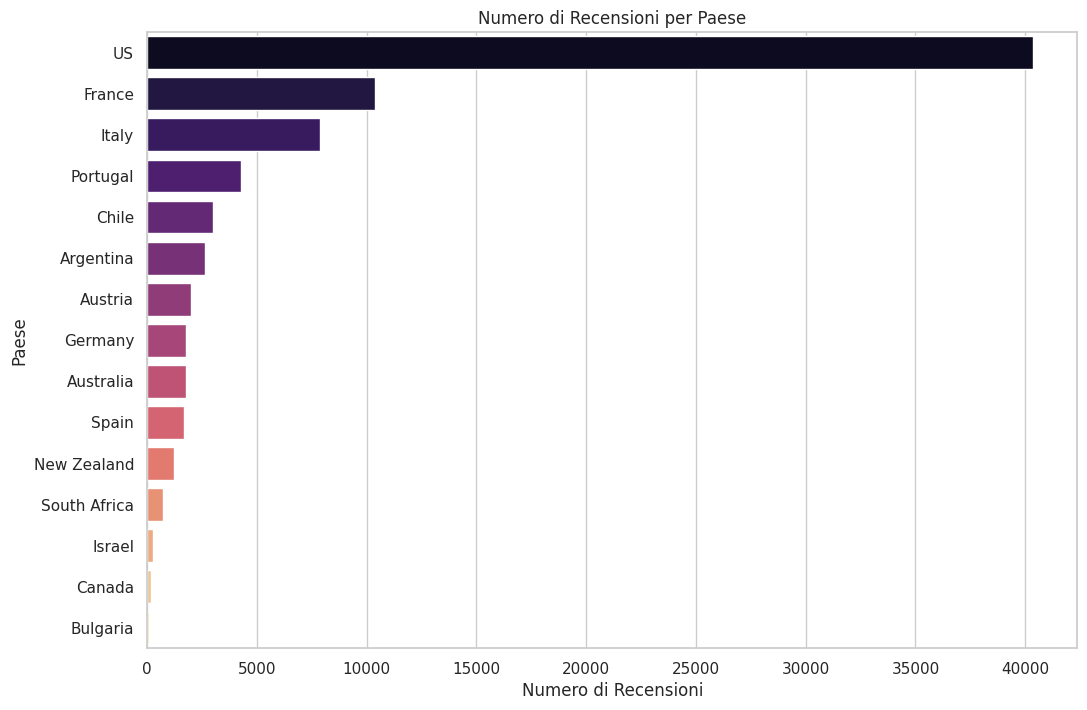

In [16]:

# Analisi delle categorie uniche
# Paesi di origine
plt.figure(figsize=(12, 8))
country_counts = df['country'].value_counts().head(15)
sns.barplot(y=country_counts.index, x=country_counts.values, palette='magma')
plt.title('Numero di Recensioni per Paese')
plt.xlabel('Numero di Recensioni')
plt.ylabel('Paese')
plt.show()


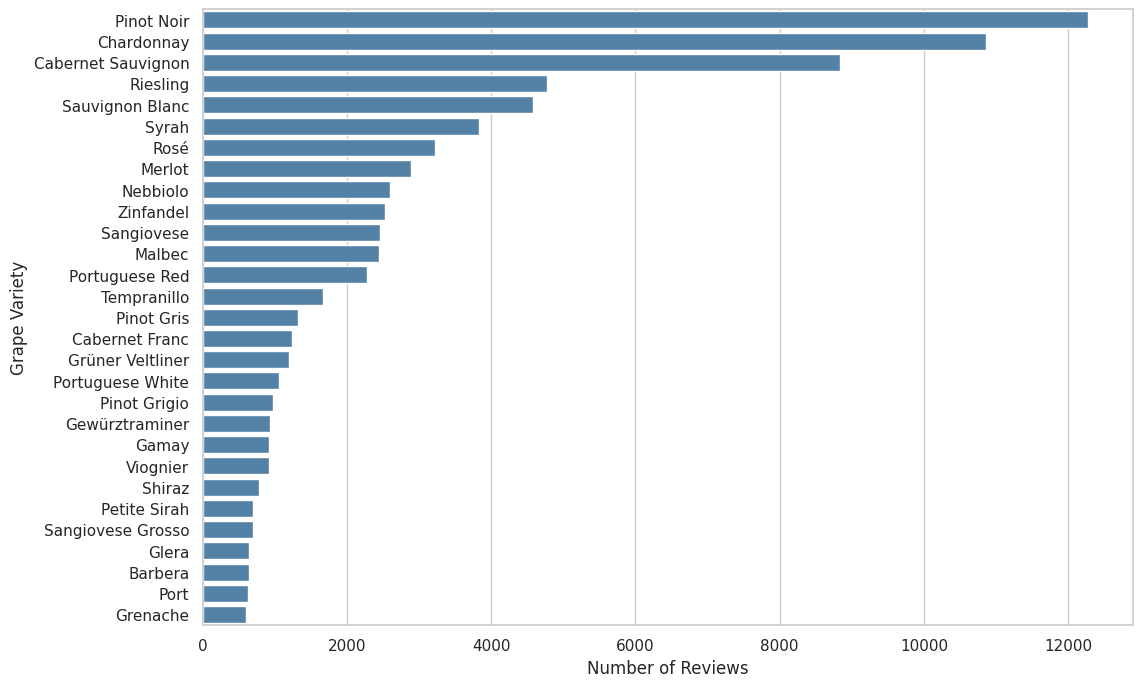

In [17]:
# Varietà di uva (colonna "variety")
plt.figure(figsize=(12, 8))
variety_counts = df['variety'].value_counts()
sns.barplot(y=variety_counts.index, x=variety_counts.values, color='steelblue')
#plt.title('Le Varietà di Uva Recensite')
plt.xlabel('Number of Reviews')
plt.ylabel('Grape Variety')
plt.show()


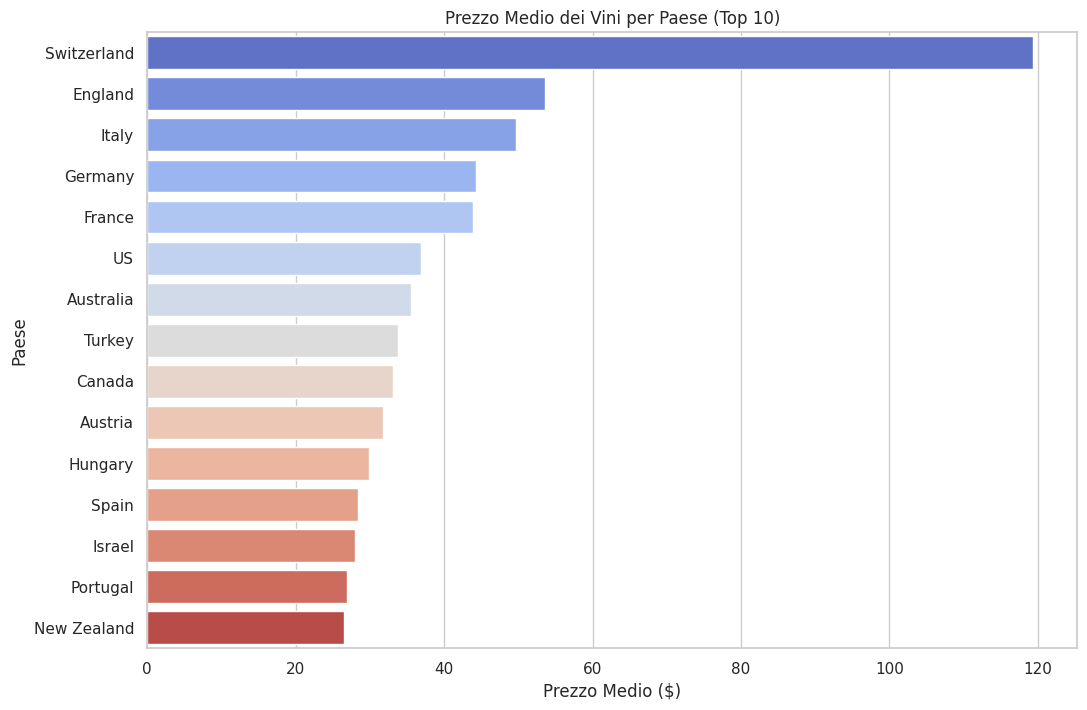

In [18]:

# Prezzo medio per paese
plt.figure(figsize=(12, 8))
avg_price_by_country = df.groupby('country')['price'].mean().sort_values(ascending=False).head(15)
sns.barplot(y=avg_price_by_country.index, x=avg_price_by_country.values, palette='coolwarm')
plt.title('Prezzo Medio dei Vini per Paese (Top 10)')
plt.xlabel('Prezzo Medio ($)')
plt.ylabel('Paese')
plt.show()


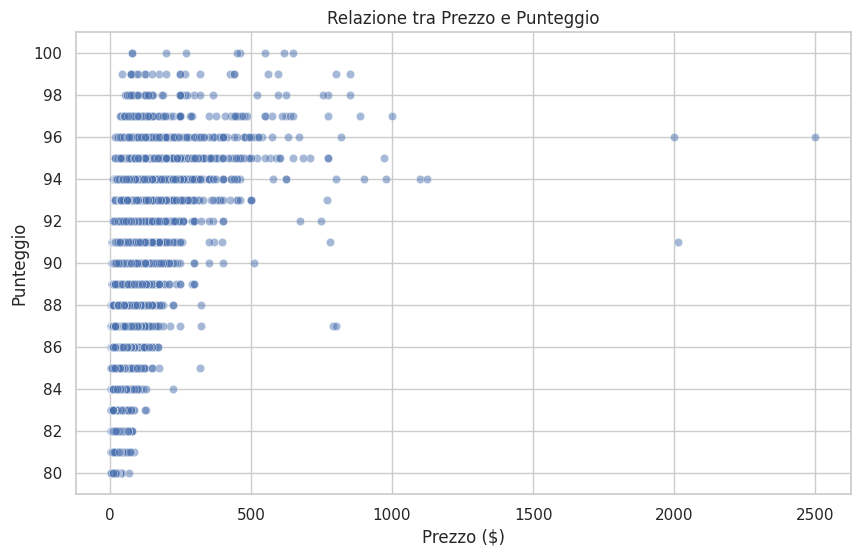

In [19]:

# Analisi della relazione tra punteggio e prezzo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='points', data=df, alpha=0.5)
plt.title('Relazione tra Prezzo e Punteggio')
plt.xlabel('Prezzo ($)')
plt.ylabel('Punteggio')
plt.yticks(np.arange(80, 101, 2))  # Set the y-axis grid granularity to 2
plt.show()


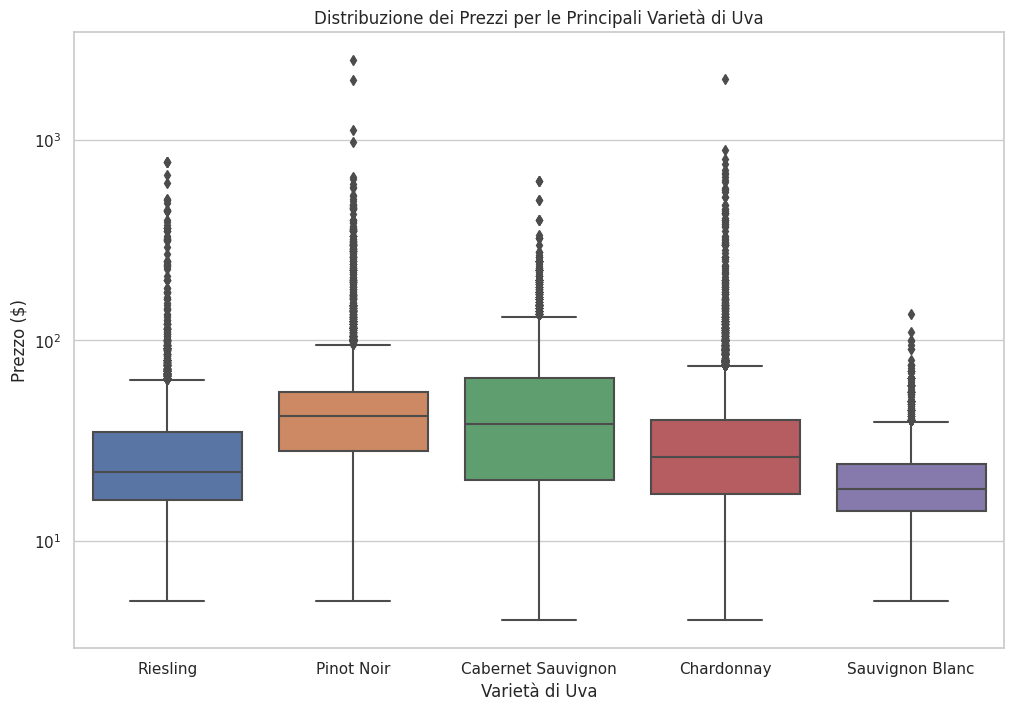

In [20]:
filtered_df = df # df[df['price'] <= 100]

# Relazione tra prezzo e punteggio per le varietà principali
top_varieties = filtered_df['variety'].value_counts().index[:5]  # Le 5 varietà più recensite
df_top_varieties = filtered_df[filtered_df['variety'].isin(top_varieties)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='variety', y='price', data=df_top_varieties)
plt.title('Distribuzione dei Prezzi per le Principali Varietà di Uva')
plt.xlabel('Varietà di Uva')
plt.ylabel('Prezzo ($)')
#plt.xticks(rotation=90)
plt.yscale('log')  # Usare una scala logaritmica per gestire l'ampia gamma di prezzi
plt.show()


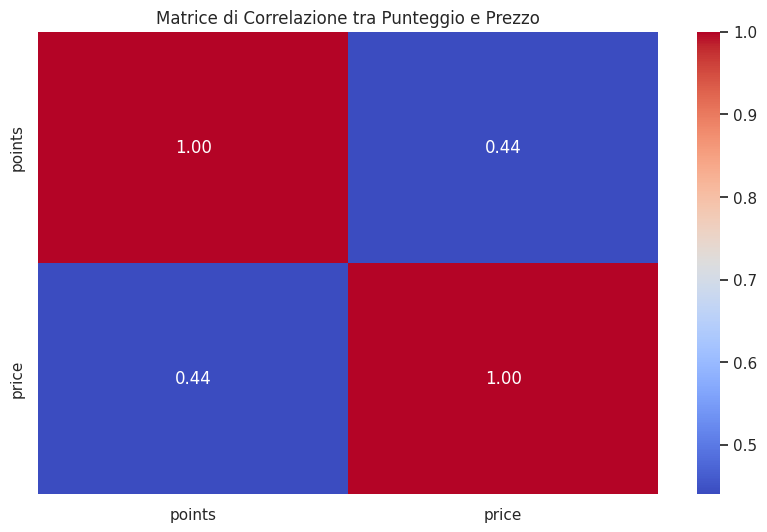

In [21]:

# Esplorazione delle correlazioni tra variabili numeriche
plt.figure(figsize=(10, 6))
corr_matrix = df[['points', 'price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice di Correlazione tra Punteggio e Prezzo')
plt.show()


In [22]:
from imblearn.over_sampling import RandomOverSampler

# Create an instance of RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = oversampler.fit_resample(df[['points', 'price']], df['variety'])

# Create a new DataFrame with the resampled data
resampled_df = pd.DataFrame({'points': X_resampled['points'], 'price': X_resampled['price'], 'variety': y_resampled})

# Check the class distribution after oversampling
resampled_df['variety'].value_counts()

variety
Portuguese Red        12277
Zinfandel             12277
Glera                 12277
Tempranillo           12277
Pinot Grigio          12277
Grenache              12277
Shiraz                12277
Sangiovese Grosso     12277
Portuguese White      12277
Barbera               12277
Nebbiolo              12277
Syrah                 12277
Viognier              12277
Grüner Veltliner      12277
Rosé                  12277
Pinot Gris            12277
Petite Sirah          12277
Cabernet Franc        12277
Sangiovese            12277
Sauvignon Blanc       12277
Gamay                 12277
Merlot                12277
Malbec                12277
Chardonnay            12277
Cabernet Sauvignon    12277
Gewürztraminer        12277
Pinot Noir            12277
Riesling              12277
Port                  12277
Name: count, dtype: int64

In [23]:
len(resampled_df)

356033

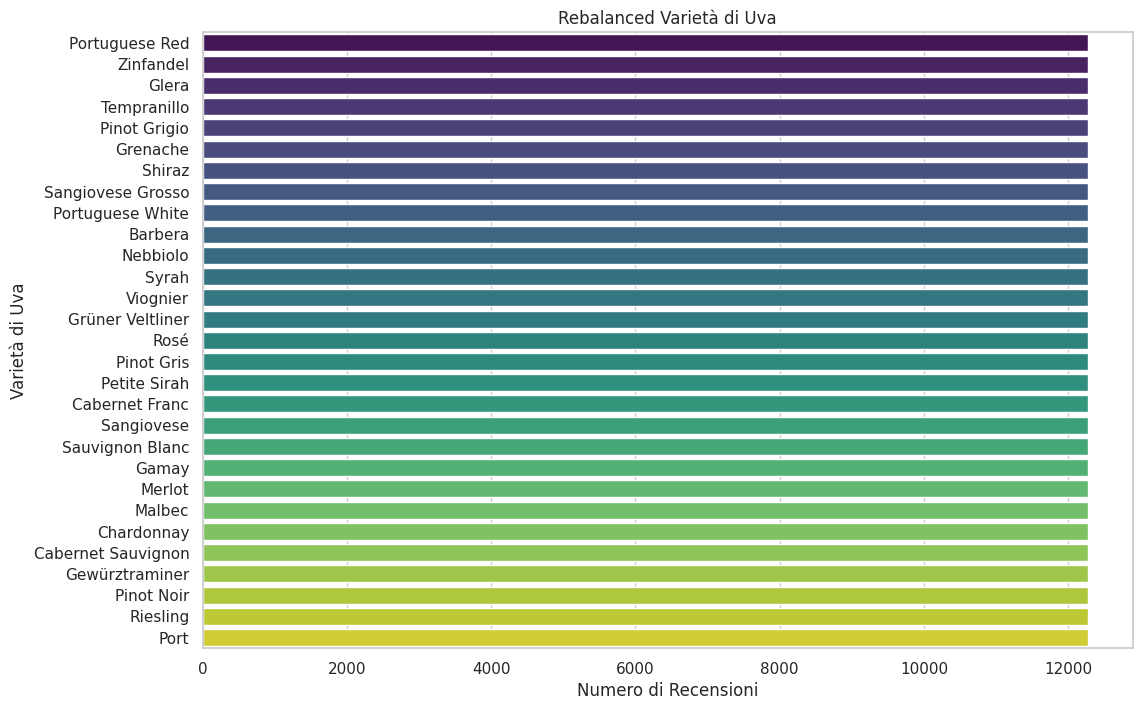

In [24]:
# Varietà di uva (colonna "variety")
plt.figure(figsize=(12, 8))
variety_counts = resampled_df['variety'].value_counts()
sns.barplot(y=variety_counts.index, x=variety_counts.values, palette='viridis')
plt.title('Rebalanced Varietà di Uva')
plt.xlabel('Numero di Recensioni')
plt.ylabel('Varietà di Uva')
plt.show()

In [25]:
from unidecode import unidecode

df['variety_contamination'] = df.apply(lambda row: unidecode(row['variety'].lower()) in unidecode(row['description'].lower()), axis=1)
contamination_count = df['variety_contamination'].sum()
contamination_count

18571

In [26]:
contaminated_record = df[df['variety_contamination'] == True].head(1)
descr = contaminated_record['description'].values[0]
descr, contaminated_record['variety'].values[0]

("Zesty orange peels and apple notes abound in this sprightly, mineral-toned Riesling. Off dry on the palate, yet racy and lean, it's a refreshing, easy quaffer with wide appeal.",
 'Riesling')